In [54]:
import pandas as pd, numpy as np, sqlite3 as db, seaborn as sns
from textblob import TextBlob

%matplotlib inline


sns.set_style('darkgrid')

In [53]:
db_file  =  '/Users/davidyerrington/virtualenvs/data/livecoding.tv/chatbot/wilford/plugins/err-mucutils/mucutils.db'
conn     =  db.connect(db_file)

# Who sends the most links to the channel!?

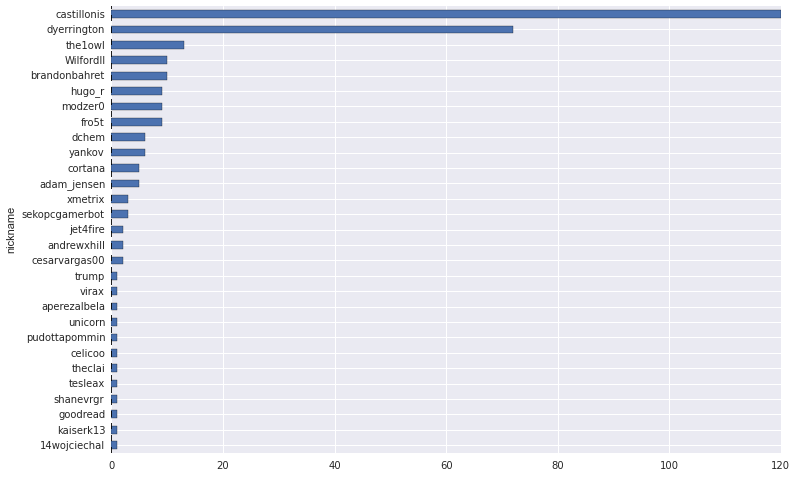

In [45]:
pd.read_sql("SELECT * FROM urls", con=conn).groupby('nickname').count().sort('url')['url'].plot(kind="barh", figsize=(12, 8))

# Who on the channel, sends the most messages?

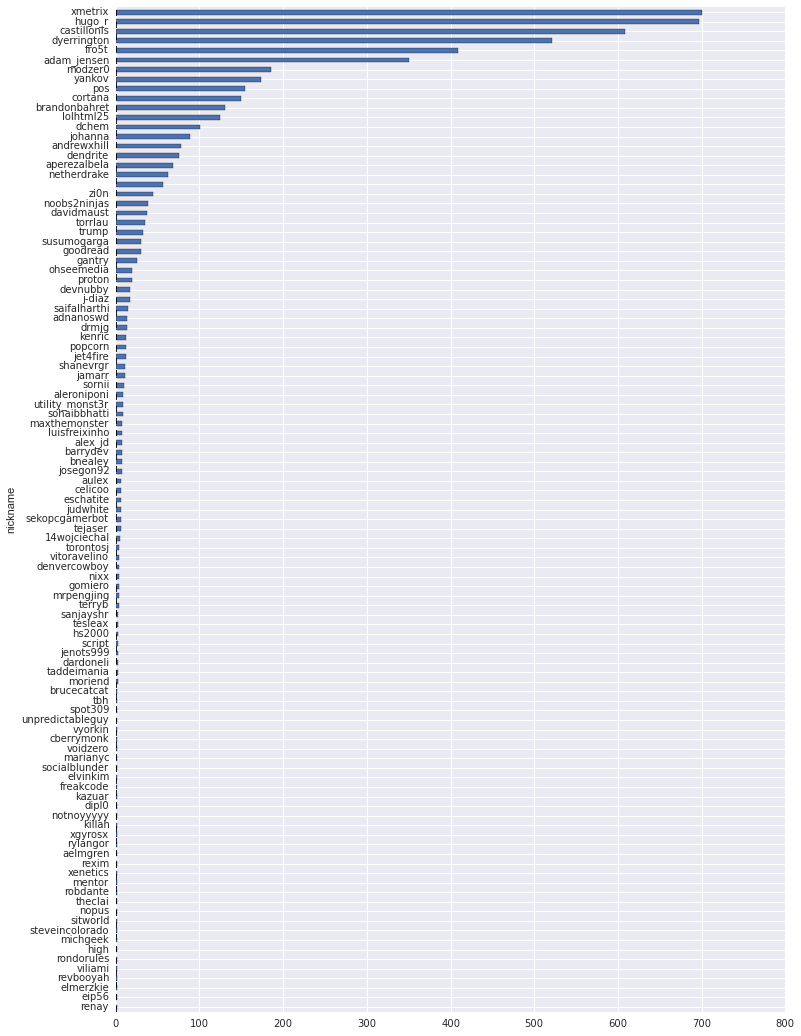

In [50]:
pd.read_sql("SELECT * FROM messages", con=conn).groupby('nickname').count().sort('id')['id'].plot(kind='barh', figsize=(12,18))

In [55]:
msg_df = pd.read_sql("SELECT * FROM messages", con=conn)

In [62]:
test_blob = TextBlob(["I like the pizza fine.", "That guy has a stupid face."])

TypeError: The `text` argument passed to `__init__(text)` must be a string, not <type 'list'>

In [63]:
msg_df['sentiment'] = msg_df['message'].map(lambda message: TextBlob(message).sentiment.polarity)

In [65]:
msg_df['subjectivity'] = msg_df['message'].map(lambda message: TextBlob(message).sentiment.subjectivity)

In [89]:
agg_msg = msg_df[(['nickname', 'sentiment'])][msg_df['subjectivity'] > 0].groupby('nickname').mean().sort('sentiment')

In [90]:
sent_df = pd.DataFrame(agg_msg)

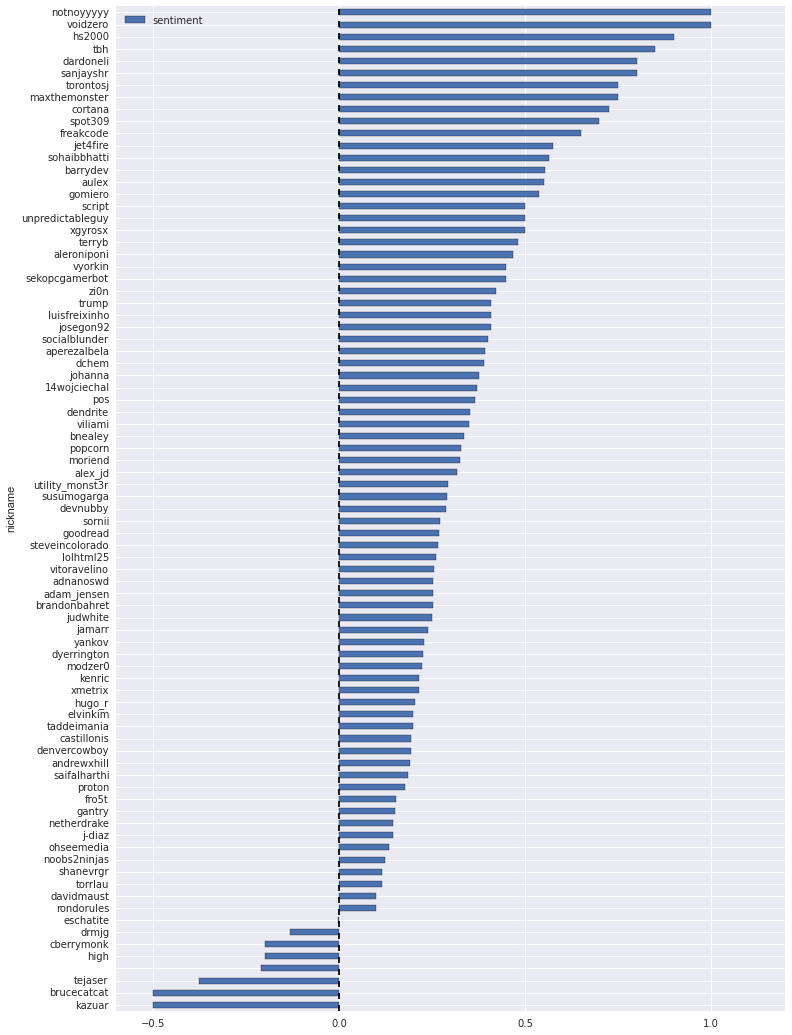

In [98]:
agg_msg.sort('sentiment').plot(kind="barh", figsize=(12, 18))

Sentiment(polarity=0.8, subjectivity=0.4)